We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use Classification algorithms.


*   Logistic Regression
*   Support Vector Machine
* K-Nearest Neighbor
* Decision Trees
* Random Forest
* CatBoost


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

#For Model Evaluation
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,f1_score,classification_report,recall_score
from sklearn.preprocessing import label_binarize

### **Read Data**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Data contains;

* Age - age in years
* Sex - (1 = male; 0 = female)
* ChestPainType - chest pain type
* RestingBP - resting blood pressure (in mm Hg on admission to the hospital)
* Cholesterol - serum cholestoral in mg/dl
* FastingBS  - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RestingECG  - resting electrocardiographic results
* MaxHR - maximum heart rate achieved
* ExerciseAngina - exercise induced angina (1 = yes; 0 = no)
* Oldpeak - ST depression induced by exercise relative to rest
* ST_Slope - the slope of the peak exercise ST segment
* HeartDisease - have disease or not (1=yes, 0=no)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
en = LabelEncoder()

In [ ]:
# df.drop(columns=['ChestPainType','RestingECG','ST_Slope'])
cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in cols:
    df[col] = en.fit_transform(df[col])

In [ ]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:
df.groupby('HeartDisease').mean()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
HeartDisease,,,,,,,,,,,
0,50.551220,0.651220,1.192683,130.180488,227.121951,0.107317,0.948780,148.151220,0.134146,0.408049,1.739024
1,55.899606,0.901575,0.448819,134.185039,175.940945,0.334646,1.021654,127.655512,0.622047,1.274213,1.057087


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## **Data Preprocessing**

In [ ]:
# RestingBP
# RestingBP represents the blood pressure of the patient. It is impossible to have values equal to 0; that's why I'll remove the outlier with value 0.
df = df.drop(df[(df['RestingBP'] == 0)].index)
# df.head()
# Dealing with the outliers (RestingBP)
q1 = df['RestingBP'].quantile(0.25)
q3 = df['RestingBP'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df['RestingBP'] >= Upper_tail) | (df['RestingBP'] <= Lower_tail)]  # | means "or"
u = pd.DataFrame(u)
print('Outliers on RestingBP:')
u.value_counts(u['HeartDisease'])


Outliers on RestingBP:


HeartDisease
1    28
0    13
dtype: int64

In [ ]:
med = np.median(df['RestingBP'])
for i in df['RestingBP']:
    if i > Upper_tail or i < Lower_tail:
            df['RestingBP'] = df['RestingBP'].replace(i, med)

In [ ]:
# Dealing with outliers (Cholesterol)
q1 = df['Cholesterol'].quantile(0.25)
q3 = df['Cholesterol'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df['Cholesterol'] >= Upper_tail) | (df['Cholesterol'] <= Lower_tail)]  # | means "or"
u = pd.DataFrame(u)
print('Outliers on Cholesterol:')
u.value_counts(df['HeartDisease'])

Outliers on Cholesterol:


HeartDisease
1    158
0     25
dtype: int64

In [ ]:
# Median imputation (Cholesterol) just on upper tail
med = np.median(df['Cholesterol'])
for i in df['Cholesterol']:
    if i > Upper_tail:
            df['Cholesterol'] = df['Cholesterol'].replace(i, med)

In [ ]:
# Dealing with outliers (Oldpeak)
q1 = df['Oldpeak'].quantile(0.25)
q3 = df['Oldpeak'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df['Oldpeak'] >= Upper_tail) | (df['Oldpeak'] <= Lower_tail)]  # | means "or"
u = pd.DataFrame(u)
u.value_counts(df['HeartDisease'])

HeartDisease
1    15
0     1
dtype: int64

In [ ]:
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [ ]:
print(x)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [ ]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 917, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, stratify= y, random_state = 2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(733, 11)
(184, 11)


## **Building Logistic Regression Model**

---



In [ ]:
model = LogisticRegression(random_state = 0, max_iter = 1000).fit(x_train, y_train)
y_pred = model.predict(x_test)
x_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred, y_train)
x_test_pred = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_pred, y_test)

In [ ]:
# print("Accuracy of training data: ",training_data_accuracy * 100)
print("Accuracy of testing data: ",testing_data_accuracy * 100)

Accuracy of testing data:  86.41304347826086


## **Building SVM Model**

---



In [ ]:
classifier = svm.SVC(kernel= 'linear')
classifier.fit(x_train, y_train)
x_train_pred2 = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred2, y_train)
x_test_pred2 = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_pred2, y_test)

In [ ]:
# print("Accuracy of training data: ",training_data_accuracy * 100)
print("Accuracy of testing data: ",testing_data_accuracy * 100)

Accuracy of testing data:  87.5


## **k-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
x_train_pred3 = knn.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred3, y_train)
x_test_pred3 = knn.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_pred3, y_test)

In [ ]:
# print("Accuracy of training data: ",training_data_accuracy * 100)
print("Accuracy of testing data: ",testing_data_accuracy * 100)

Accuracy of testing data:  70.65217391304348


### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

x_train_pred4 = dt.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred4, y_train)
x_test_pred4 = dt.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_pred4, y_test)

In [ ]:
# print("Accuracy of training data: ",training_data_accuracy * 100)
print("Accuracy of testing data: ",testing_data_accuracy * 100)

Accuracy of testing data:  84.78260869565217


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# First model
RF = RandomForestClassifier(random_state=42, n_estimators=100)
                            
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

x_train_pred5 = RF.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred5, y_train)
x_test_pred5 = RF.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_pred5, y_test)

In [ ]:
# print("Accuracy of training data: ",training_data_accuracy * 100)
print("Accuracy of testing data: ",testing_data_accuracy * 100)

Accuracy of testing data:  90.21739130434783


## **CatBoost**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=80,
                           learning_rate=1,
                           depth=2)

# Fit model

cat.fit(x_train, y_train)
# Get predicted classes
preds_class = cat.predict(x_test)
x_train_pred = cat.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred, y_train)
x_test_pred = cat.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_pred, y_test)

# print(model.get_best_iteration())
# print("Accuracy of training data: ",training_data_accuracy * 100)
print("Accuracy of testing data: ",testing_data_accuracy * 100)

0:	learn: 0.4569247	total: 46.8ms	remaining: 3.7s
1:	learn: 0.3780176	total: 47.6ms	remaining: 1.86s
2:	learn: 0.3571418	total: 48.1ms	remaining: 1.24s
3:	learn: 0.3429555	total: 48.6ms	remaining: 924ms
4:	learn: 0.3350521	total: 49.1ms	remaining: 736ms
5:	learn: 0.3243720	total: 49.6ms	remaining: 611ms
6:	learn: 0.3215358	total: 50ms	remaining: 521ms
7:	learn: 0.3182064	total: 50.4ms	remaining: 454ms
8:	learn: 0.3145784	total: 50.8ms	remaining: 401ms
9:	learn: 0.3125816	total: 51.3ms	remaining: 359ms
10:	learn: 0.3103756	total: 51.7ms	remaining: 324ms
11:	learn: 0.3083249	total: 52.1ms	remaining: 295ms
12:	learn: 0.3066069	total: 52.6ms	remaining: 271ms
13:	learn: 0.3021815	total: 53ms	remaining: 250ms
14:	learn: 0.3006519	total: 53.4ms	remaining: 232ms
15:	learn: 0.3003477	total: 53.9ms	remaining: 215ms
16:	learn: 0.2969752	total: 54.3ms	remaining: 201ms
17:	learn: 0.2925115	total: 54.8ms	remaining: 189ms
18:	learn: 0.2922005	total: 55.3ms	remaining: 178ms
19:	learn: 0.2889910	total:

In [ ]:
models_accuracy_scores = {}
models_accuracy_scores["Logistic Regression"] = [f1_score(y_test,model.predict(x_test),average="weighted"),
                                                 model.score(x_test,y_test),
                                                 recall_score(y_test,model.predict(x_test), average = 'binary')]
models_accuracy_scores["SVM"] = [f1_score(y_test,classifier.predict(x_test),average="weighted"),
                                                 classifier.score(x_test,y_test),
                                                 recall_score(y_test,classifier.predict(x_test), average = 'binary')]
models_accuracy_scores["K-Nearest Neighbors"] = [f1_score(y_test,knn.predict(x_test),average="weighted"),
                                                 knn.score(x_test,y_test),
                                                 recall_score(y_test,knn.predict(x_test), average = 'binary')]
models_accuracy_scores["Random Forest"] = [f1_score(y_test,RF.predict(x_test),average="weighted"),
                                                 RF.score(x_test,y_test),
                                                 recall_score(y_test,RF.predict(x_test), average = 'binary')]
models_accuracy_scores["Decision Tree"] = [f1_score(y_test,dt.predict(x_test),average="weighted"),
                                                 dt.score(x_test,y_test),
                                                 recall_score(y_test,dt.predict(x_test), average = 'binary')]
models_accuracy_scores["CatBoost"] = [f1_score(y_test,cat.predict(x_test),average="weighted"),
                                                 cat.score(x_test,y_test),
                                                 recall_score(y_test,cat.predict(x_test), average = 'binary')]

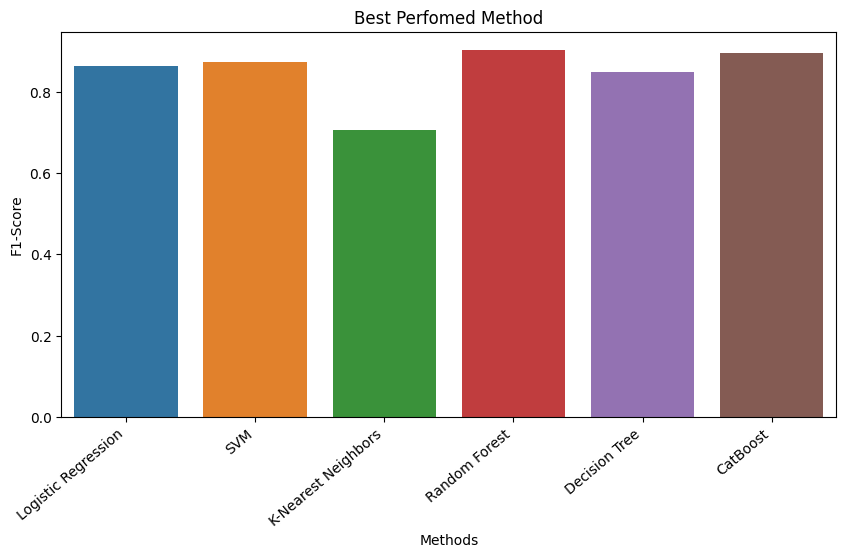

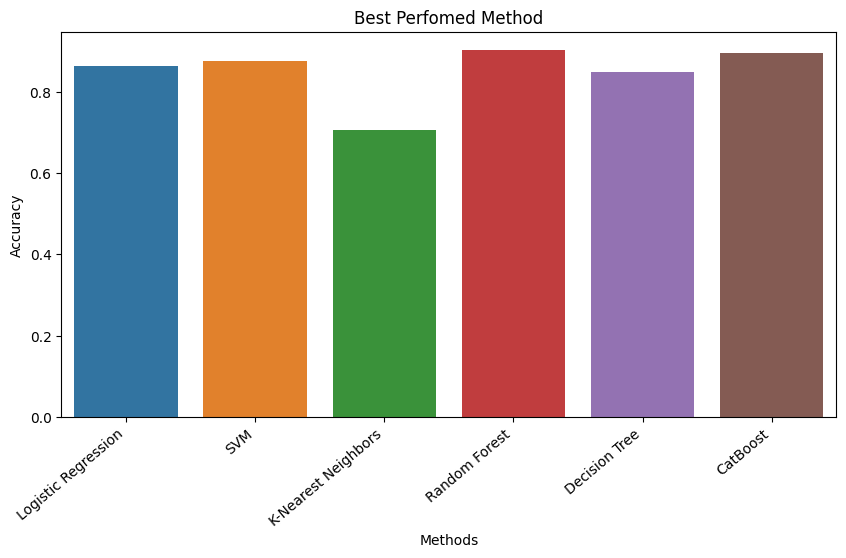

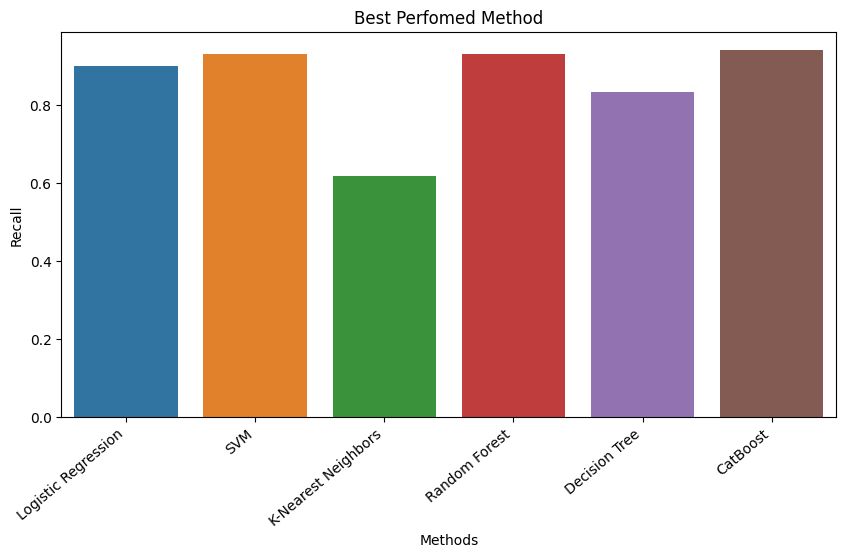

In [ ]:
names = ["F1-Score","Accuracy","Recall"]
df_scores = pd.DataFrame(models_accuracy_scores.values(),columns = names,index=models_accuracy_scores.keys())
    
for names in df_scores.columns:
    fig = plt.figure(figsize = (10, 5))
    ax = sns.barplot(y=df_scores[names],x=df_scores.index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 
    plt.xlabel("Methods")
    plt.ylabel(names)
    plt.title("Best Perfomed Method")
    plt.show()

In [ ]:
df_scores

,F1-Score,Accuracy,Recall
Logistic Regression,0.863619,0.864130,0.901961
SVM,0.874012,0.875000,0.931373
K-Nearest Neighbors,0.705689,0.706522,0.617647
Random Forest,0.901892,0.902174,0.931373
Decision Tree,0.848206,0.847826,0.833333
CatBoost,0.896150,0.896739,0.941176


## Review Model

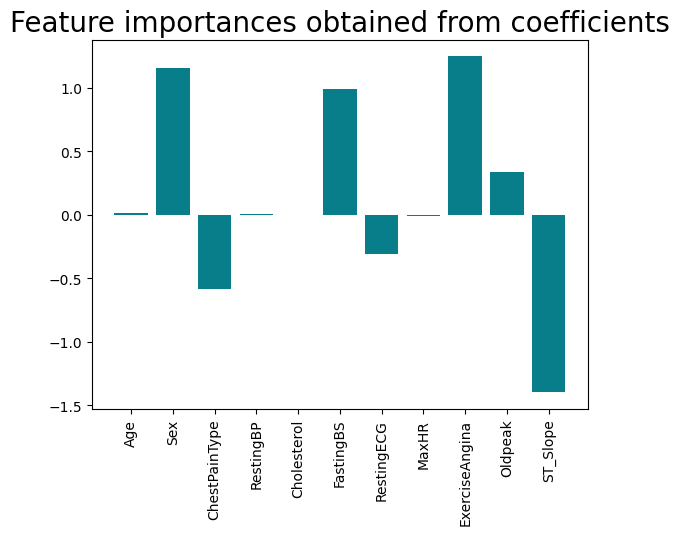

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

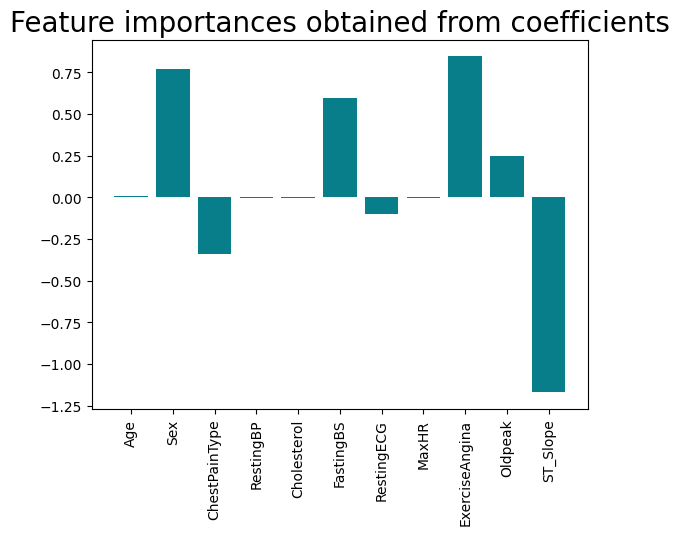

In [ ]:
imp = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': classifier.coef_[0]
})
plt.bar(x=imp['Attribute'], height=imp['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('model.pickle')
print(projectabspathname)
projectname = 'UTILISING MACHINE LEARNING TECHNIQUES FOR HEART RISK PREDICTION.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()

/content/model.pickle
